With support vector machines, you have two classes and the data is plotted as points. You then divide the two groups with a line called a hyperplane. New points are then tested according to which side of the line they fall.

Finding the optimal hyperplane is where there is the maximum margin between the groups. You can find the hyperplane mathematically or it can be done using the kernel trick (for a non-linear hyperplane)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

X= iris.data
Y= iris.target

In [5]:
print (iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
from sklearn.svm import SVC

In [7]:
model = SVC()

In [8]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.4,random_state=3)

In [21]:
# Fit the model with the training data
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [22]:
from sklearn import metrics

In [23]:
# Test the model to see how well it predicts the testing data

predicted = model.predict(X_test)

expected = Y_test

In [25]:
# Compare the accuracy between expected and predicted
print(metrics.accuracy_score(expected,predicted))

0.9666666666666667


In [26]:
from sklearn import svm

In [27]:
X = iris.data[:,:2]
Y= iris.target

In [28]:
C= 1.0

In [30]:
svc = svm.SVC(kernel='linear',C=C).fit(X,Y)

In [31]:
rbf_svc = svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(X,Y)

In [32]:
poly_svc = svm.SVC(kernel='poly',degree=3,C=C).fit(X,Y)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [33]:
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [34]:
h = 0.02

x_min = X[:,0].min() -1
x_max = X[:,0].max() +1

In [35]:
y_min = X[:,1].min() -1
y_max = X[:,1].max() +1

In [36]:
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [37]:
titles = ['SVC with linear kernel','LinearSVC (linear kernel)','SVC with RBF kernel','SVC with polynomial (degree 3) kernel']

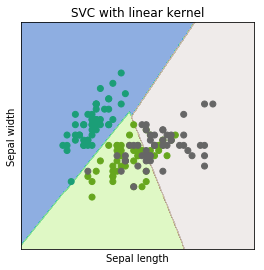

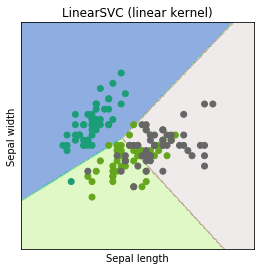

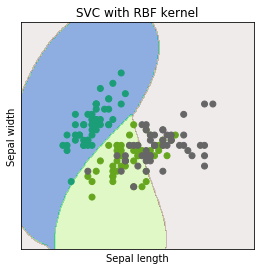

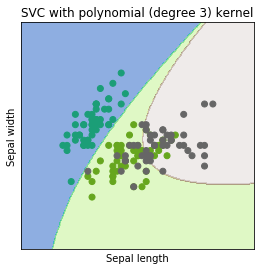

In [39]:
for i,clf in enumerate((svc,lin_svc,rbf_svc,poly_svc)):
    
    plt.figure(figsize=(10,10))
    
    plt.subplot(2,2,i+1)
    
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    Z= Z.reshape(xx.shape)
    
    plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5)
    
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Dark2)
    
    plt.xlabel('Sepal length')
    
    plt.ylabel('Sepal width')
    
    plt.xlim(xx.min(),xx.max())
    
    plt.ylim(yy.min(),yy.max())
    
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

These are the different visualizations of the data and hyperplanes. Beginning with the linear methods and then the non-linear kernel methods